In [34]:
import numpy
import matplotlib.pyplot as plt
from collections import Counter

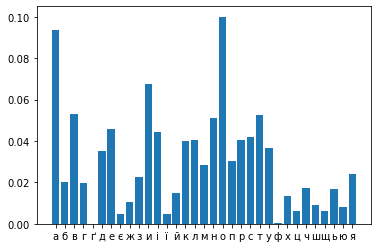

In [99]:
#1

alphabet = ['а', 'б', 'в', 'г', 'ґ', 'д', 'е', 'є', 'ж', 'з', 'и', 
            'і', 'ї', 'й', 'к', 'л', 'м', 'н', 'о', 'п', 'р', 'с', 
            'т', 'у', 'ф', 'х', 'ц', 'ч', 'ш', 'щ', 'ь', 'ю', 'я']


def cleanstr(s):
    l=""
    s=s.lower()
    for i in s:
        if i in alphabet:
            l+=i
    return l

f = open('book.txt', 'r',encoding="utf-8")
text=f.readlines()
text=cleanstr("".join(text))
#print(text[:100])
f.close()

d=Counter(cleanstr(text))
for i in alphabet:
    if i not in d:
        d[i]=0.00001

su=sum(d.values())
prob_lett=[d[i]/su for i in alphabet]
plt.bar(alphabet,prob_lett)
plt.show()


In [100]:
#2

sk="зима"#input()
pt_inp="веснакраснаколисьприйде"#input()
pt=pt_inp.strip()

Alph="абвгґдеєжзиіїйклмнопрстуфхцчшщьюя"
alph={Alph[i]:i for i in range(len(Alph))}
alph_rec={i:Alph[i] for i in range(len(Alph))}

def vigenere_encr(sk,pt):
    ct=""
    for i in range(len(pt)):
        k=(alph[pt[i]]+alph[sk[i%len(sk)]])%len(Alph)
        ct+=alph_rec[k]
    return ct

def vigenere_decr(sk,ct):
    pt=""
    for i in range(len(ct)):
        k=(alph[ct[i]]-alph[sk[i%len(sk)]])%len(Alph)
        pt+=alph_rec[k]
    return pt

print(pt)
ct=vigenere_encr(sk,pt)
print(ct)
pt=vigenere_decr(sk,ct)
print(pt)

веснакраснаколисьприйде
імґнзфгаьчмкчхцсещгитлт
веснакраснаколисьприйде


In [101]:
# 3

def countIoC(txt):
    letterCounts = Counter(txt)

    F = 0
    for letter in letterCounts:
        F += letterCounts[letter] * (letterCounts[letter] - 1)

    N = len(txt)
    IoC = F / (N * (N - 1))
    return IoC
     
print("pt: ",text[:200])
cipherText = vigenere_encr("панасмирний",text)
print("\nct: ",cipherText[:200])
ct_len = len(cipherText)


IoC_list = []

for period in range(5, 21):
    period_list = []
    for i in range(period):
        substring = ""
        for j in range(i, ct_len, period):
            substring += cipherText[j]
        period_list.append(substring)
    IoC_list.append([countIoC(i) for i in period_list])

IoC_average = [sum(i) / len(i) for i in IoC_list]
key_len = 5 + IoC_average.index(max(IoC_average))
print("\nKey length:", key_len)

def CaesarCipher(txt, k):
    t=""
    for c in txt:
        if c in alphabet:
            t+=alphabet[(alphabet.index(c)-k)%len(alphabet)]
        else:
            t+=c
    return t


def ChiSq(txt):
    
    letter_count=Counter(txt)
    all_letters = sum(dict(letter_count).values())
    
    cs = 0
    for i in alphabet:
        cs += ((letter_count[i] - 
                all_letters*prob_lett[alphabet.index(i)])
               **2)/(all_letters*prob_lett[alphabet.index(i)])
    return cs
     

secret_key = ""
for i in range(key_len):
    substring = ""
    for j in range(i, ct_len, key_len):
        substring += cipherText[j]
    all_chisq = []
    for k in range(len(alphabet)):
        chisq = ChiSq(CaesarCipher(substring, k))
        all_chisq.append(chisq)

    s = alphabet[all_chisq.index(min(all_chisq))]
    secret_key += s

print("Key:", secret_key)

plainText = vigenere_decr(secret_key,cipherText)
print("\n",plainText[:200])

pt:  хібаревутьволиякяслаповніпанасмирнийчастинапершапольовацарівнанадворівеснавповнікудинегляньскрізьрозвернулосярозпустилосязацвілопишнимцвітомяснесонцетеплейприязнещеневспілоналожитипалючихслідівназемлю

ct:  ііоажтїиеєлґлчявлювнщюсншпсаижарагиьчсґяьбияхрїаєбхнвїйїаґіуаиґнллґршвчґчрпщюсншкісрґуйшонксвгсщкьюшвурдехддзаґзгуздрввюїшаивяюшечдьщмивядшгмюьхсвнктяцгхпяпґирхчцймьхвдпяюшґнхючиеиємхоірдєлшдяочрцмщбю

Key length: 11
Key: панасмирний

 хібаревутьволиякяслаповніпанасмирнийчастинапершапольовацарівнанадворівеснавповнікудинегляньскрізьрозвернулосярозпустилосязацвілопишнимцвітомяснесонцетеплейприязнещеневспілоналожитипалючихслідівназемлю
